In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
%matplotlib inline

# What we are given:

In [2]:
pd.set_option('display.max_rows', None)
spend = pd.read_csv('spend_data.csv', parse_dates=['date'])
spend.head()

,Unnamed: 0,date,campaign,spend
0,1,2020-05-24,facebook_5_B,17.0238
1,2,2020-05-24,facebook_5_D,1.7034
2,3,2020-05-24,instagram_5_B,14.8920
3,4,2020-05-24,instagram_5_D,1.6116
4,6,2020-05-25,facebook_5_B,22.6644


In [3]:
spend=pd.DataFrame(spend)

In [4]:
spend.drop(spend.columns[0], axis=1, inplace=True)
spend.head()

,date,campaign,spend
0,2020-05-24,facebook_5_B,17.0238
1,2020-05-24,facebook_5_D,1.7034
2,2020-05-24,instagram_5_B,14.8920
3,2020-05-24,instagram_5_D,1.6116
4,2020-05-25,facebook_5_B,22.6644


In [5]:
trials = pd.read_csv('trials_data.csv', parse_dates=['date'])

In [6]:
trials=pd.DataFrame(trials)

In [7]:
trials.drop(trials.columns[0], axis=1, inplace=True)
trials.head()

,date,trials
0,2020-05-01,0.0
1,2020-05-02,0.0
2,2020-05-03,0.0
3,2020-05-04,0.0
4,2020-05-05,0.0


### Merging two data

In [8]:
data=pd.merge(trials,spend,on='date')
data.head(10)

,date,trials,campaign,spend
0,2020-05-24,0.0,facebook_5_B,17.0238
1,2020-05-24,0.0,facebook_5_D,1.7034
2,2020-05-24,0.0,instagram_5_B,14.8920
3,2020-05-24,0.0,instagram_5_D,1.6116
4,2020-05-25,1.0,facebook_5_B,22.6644
5,2020-05-25,1.0,facebook_5_D,8.2314
6,2020-05-25,1.0,instagram_5_B,12.9642
7,2020-05-25,1.0,instagram_5_D,6.1098
8,2020-05-26,0.0,facebook_5_B,19.0842
9,2020-05-26,0.0,facebook_5_D,33.1704


In [95]:
data[data['campaign']=='facebook_5_B'].head()

,date,trials,campaign,spend,day_of_week
0,2020-05-24,0.0,facebook_5_B,17.0238,Sunday
4,2020-05-25,1.0,facebook_5_B,22.6644,Monday
8,2020-05-26,0.0,facebook_5_B,19.0842,Tuesday
12,2020-05-27,2.0,facebook_5_B,37.4340,Wednesday
16,2020-05-28,0.0,facebook_5_B,11.3628,Thursday


In [55]:
data[data['campaign']=='facebook_5_B'].count()

date           185
trials         185
campaign       185
spend          185
day_of_week    185
dtype: int64

In [56]:
data[data['campaign']=='facebook_5_B'].max()

date           2020-11-24 00:00:00
trials                         196
campaign              facebook_5_B
spend                      2095.09
day_of_week              Wednesday
dtype: object

In [70]:
data['campaign'].value_counts().head(5)

facebook_2_C     190
facebook_5_D     190
instagram_2_C    189
instagram_5_D    185
facebook_5_B     185
Name: campaign, dtype: int64

In [82]:
def func(campaign):
    if 'facebook' in campaign[:-3]:
        return True
    else:
        return False

In [83]:
data['campaign'].apply(lambda x: func(x)).head(5)

0     True
1     True
2    False
3    False
4     True
Name: campaign, dtype: bool

In [84]:
len(data.columns)

5

In [86]:
len(data.index)

1945

In [87]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1945 entries, 0 to 1944
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   date         1945 non-null   datetime64[ns]
 1   trials       1945 non-null   float64       
 2   campaign     1945 non-null   object        
 3   spend        1945 non-null   float64       
 4   day_of_week  1945 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 91.2+ KB


In [88]:
data.describe()

,trials,spend
count,1945.000000,1945.000000
mean,307.679692,840.618102
std,237.897648,1254.923065
min,0.000000,0.132600
25%,110.000000,138.352800
50%,231.000000,373.309800
75%,479.000000,975.293400
max,1046.000000,7216.438800


# 1- Data  exploration
## 1-1 General intuition of data

In [9]:
# total number of trials happend over whole period of time
round(data['trials'].sum())

598437

In [10]:
# total amount of money spent over whole period of time
round(data['spend'].sum(),2)

1635002.21

<AxesSubplot:xlabel='date'>

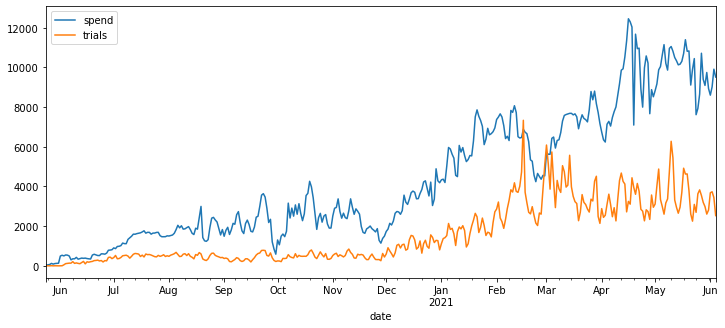

In [11]:
#plot1
# first let us look at the histroy of spending money and trials over the time (we groupby the date)
# it seems the client has increased the spending over last couple of months, however, the number of trials remained almost constant. So the strategy of 
#allocating was not efficient. 
data.groupby(by='date').sum()[['spend','trials']].plot(figsize=(12, 5))

In [12]:
# clients mostly invested on facebook_1_A
spend.groupby(by='campaign').sum().sort_values(by='spend')

,spend
campaign,
facebook_5_A,9052.510200
apple_5_A,11395.297200
instagram_1_D,11892.162164
facebook_1_D,12206.690645
instagram_5_D,37174.075102
facebook_5_D,55673.730102
apple_1_A,66856.073400
apple_4_D,87203.053800
instagram_5_B,90357.940736


In [13]:
# the client got the highest trials from facebook_2_C
data.groupby(by=['date','campaign']).sum()[['spend','trials']].sort_values(by='date').head()

spend  trials
date       campaign                      
2020-05-24 facebook_5_B   17.0238     0.0
           facebook_5_D    1.7034     0.0
           instagram_5_B  14.8920     0.0
           instagram_5_D   1.6116     0.0
2020-05-25 facebook_5_B   22.6644     1.0

In [14]:
data.groupby(by='campaign').sum()[['trials']].sort_values(by='trials')

,trials
campaign,
apple_5_A,15342.0
facebook_5_B,18076.0
instagram_5_B,18076.0
instagram_5_D,18076.0
apple_1_A,19495.0
facebook_5_D,20026.0
facebook_5_A,22274.0
facebook_3_A,31528.0
facebook_1_D,49936.0


<AxesSubplot:ylabel='Frequency'>

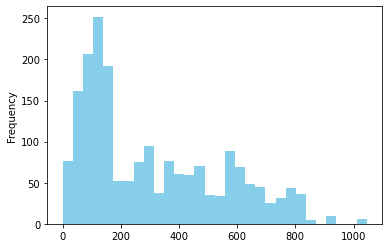

In [15]:
#plot2
# tirals around 0-200 occured more often
data['trials'].plot.hist(bins=30,color = "skyblue")

<AxesSubplot:ylabel='Frequency'>

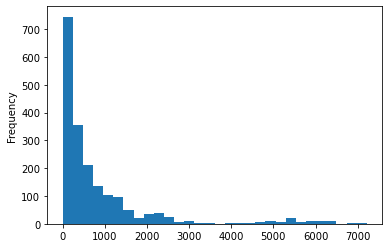

In [16]:
#plot3
# the most occured amount of spend money on campaigns are around 0-500 $
data['spend'].plot.hist(bins=30)

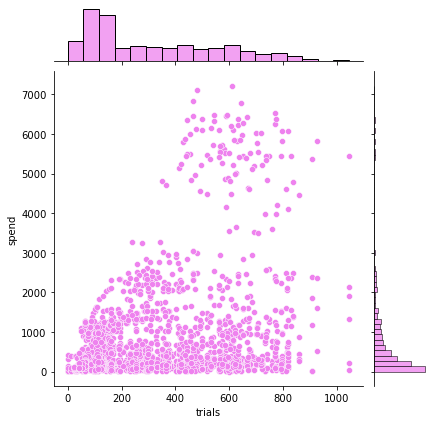

In [17]:
#plot4
# this jointplot indicates that for high spending  the number of trials tend to increase. which is natural
sns.jointplot(x='trials',y='spend',data=data, color='violet')

## 1-2 Intuition about different netwrok, different target_type and different audiance type

In [18]:
# here we separet different targets. so split each campain by its target type and audiance type.
data_separated_targets = data.assign(Target_audiance =data['campaign'].str[-1:], Target_type =data['campaign'].str[-3:-2])

In [19]:
#pd.set_option('display.max_rows', None)
data_separated_targets.head()

,date,trials,campaign,spend,Target_audiance,Target_type
0,2020-05-24,0.0,facebook_5_B,17.0238,B,5
1,2020-05-24,0.0,facebook_5_D,1.7034,D,5
2,2020-05-24,0.0,instagram_5_B,14.8920,B,5
3,2020-05-24,0.0,instagram_5_D,1.6116,D,5
4,2020-05-25,1.0,facebook_5_B,22.6644,B,5


In [20]:
#replace the campain with network.
data_separated_targets  = data_separated_targets.assign(campaign =data['campaign'].str[:-4])

In [21]:
data_separated_targets.head()

,date,trials,campaign,spend,Target_audiance,Target_type
0,2020-05-24,0.0,facebook,17.0238,B,5
1,2020-05-24,0.0,facebook,1.7034,D,5
2,2020-05-24,0.0,instagram,14.8920,B,5
3,2020-05-24,0.0,instagram,1.6116,D,5
4,2020-05-25,1.0,facebook,22.6644,B,5


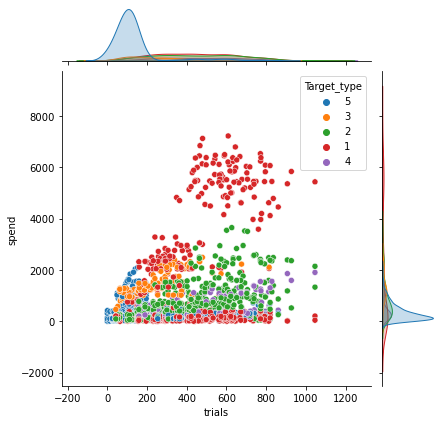

In [22]:
#plot5
# this separation over target_types indicates that we might have more efficient on campaigns with 
# target_type 1  and 5 (down red  and blue points) which spend less money.
# 1,2,..5 in the plot are target types.
sns.jointplot(x='trials',y='spend',data=data_separated_targets ,hue='Target_type')

In [23]:
data_separated_targets_twofive= data_separated_targets[(data_separated_targets['Target_type']=='2')  | (data_separated_targets['Target_type']=='1')]

In [25]:
data_separated_targets_twofive= data_separated_targets[ (data_separated_targets['Target_type']=='2')  | (data_separated_targets['Target_type']=='5')]

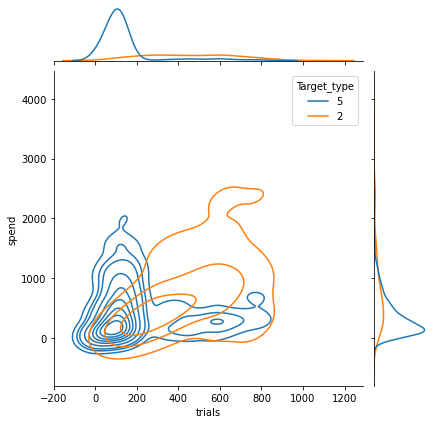

In [26]:
sns.jointplot(x='trials',y='spend',data=data_separated_targets_twofive ,hue='Target_type', kind="kde" )

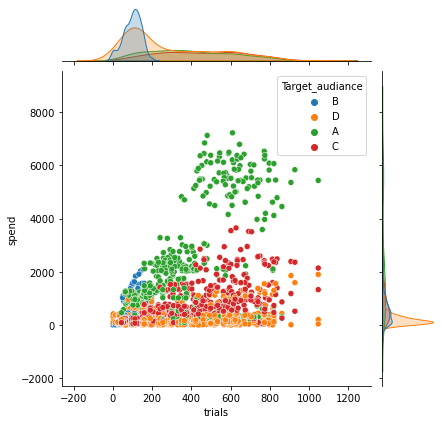

In [27]:
#plot6
# following plot indicates that the audiancese group D and A shows less spending (orange and green points on bottom 
# points with minimum spending) for even high trials. 
sns.jointplot(x='trials',y='spend',data=data_separated_targets ,hue='Target_audiance')

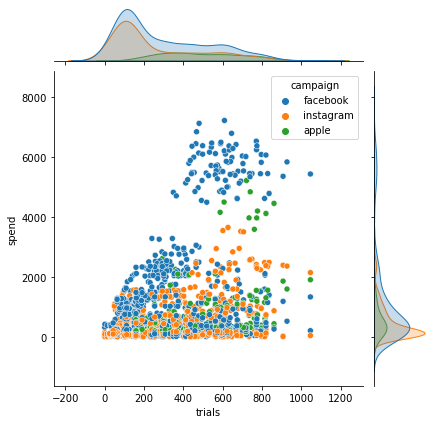

In [28]:
#plot7
# this plot actually does not indicate which netwrok givs better spend, becuase we see that all 3 colors are present
# in the small spending regions.
sns.jointplot(x='trials',y='spend',data=data_separated_targets ,hue='campaign')

## 1-3 Investigating all 14 campaigns to see which ones are most efficient

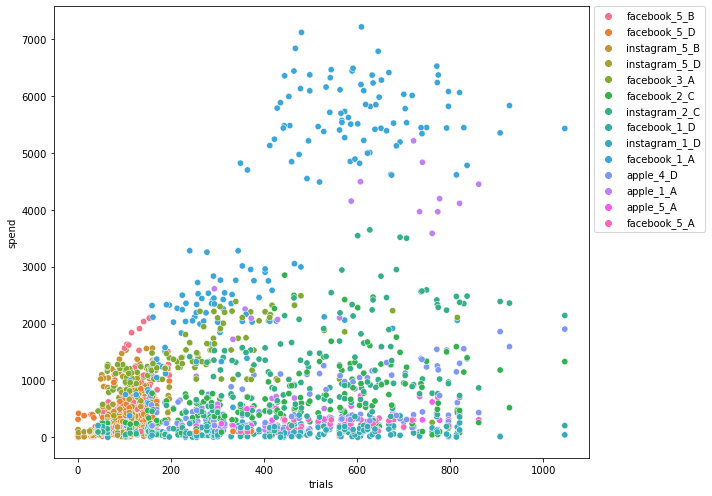

In [29]:
#plot8
# the following scatter plot shows the money spent and the number of trails for each campaign. In the first glance
# we can see the colors related to points instagram_1_D or facebook_1_D has higher trials while spending less 
# money --> so, more efficient
plt.figure(figsize=(10,7))
sns.scatterplot(data=data,x='trials',y='spend',hue="campaign",s=40 )


plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.tight_layout()

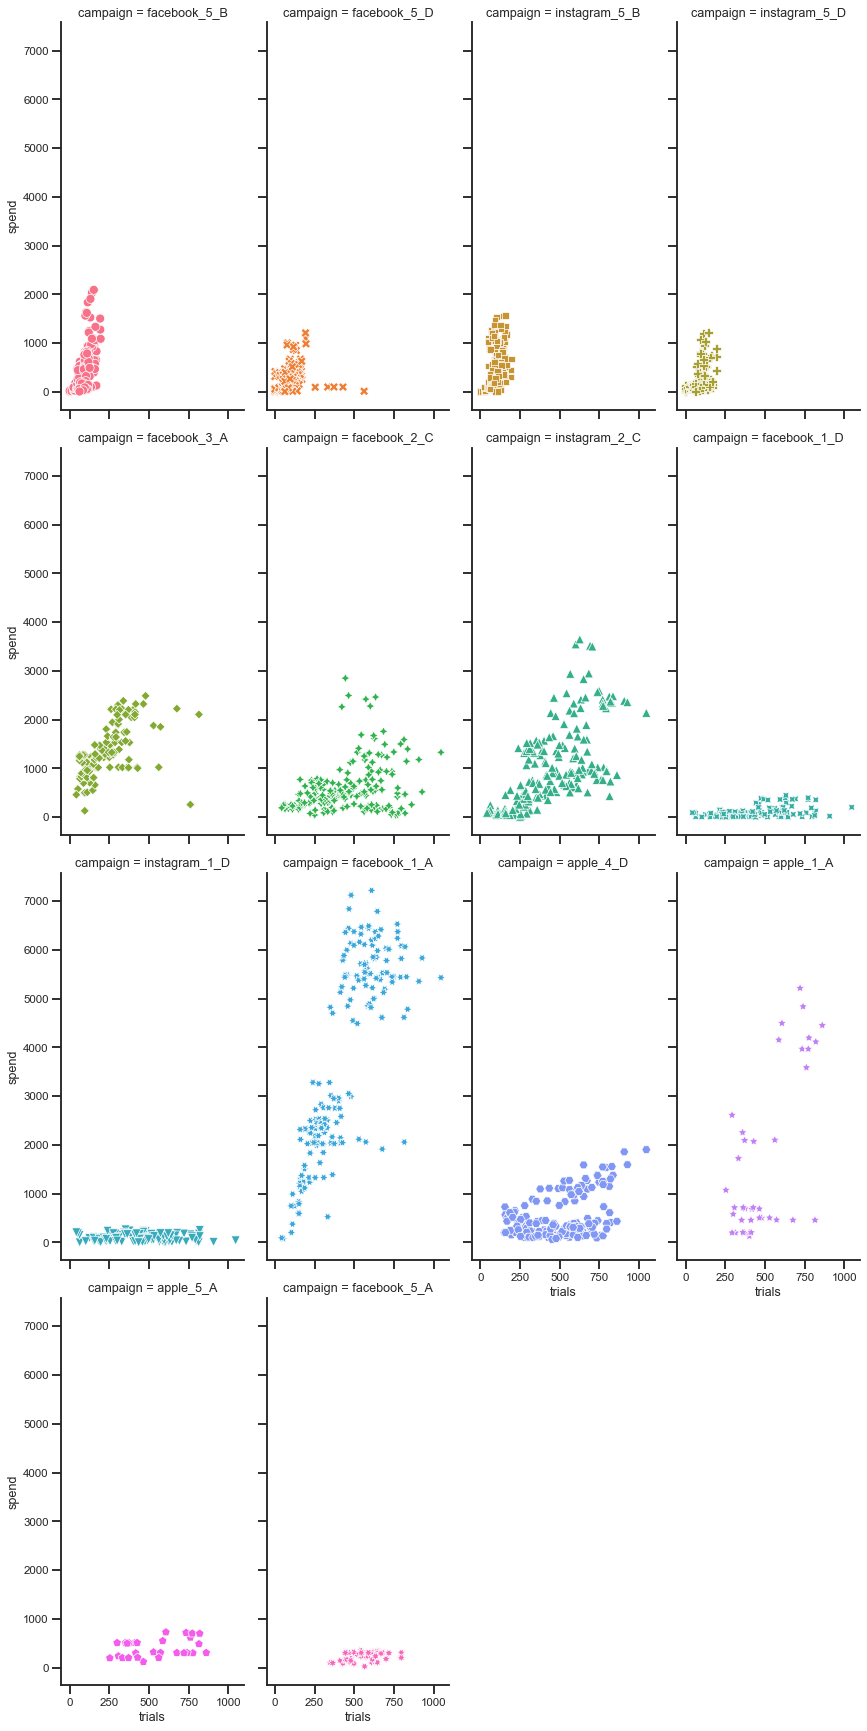

In [30]:
#plot9
# in order to better see the latter outcome, we vitualize all 14 campaigns. 
# these plots confirm that the best is instagram_1_D and facebook_1_D.
sns.set(rc={'figure.figsize':(40,40)}) 
sns.set_context('talk', font_scale=0.7) 
sns.set_style('ticks')
g = sns.relplot(data=data,x='trials',y='spend',hue="campaign",col="campaign",col_wrap=4,legend=False,height=6, 
                aspect=0.5, style='campaign', sizes=(500,400))


### In the table, we separate campaigns to better data analysis

In [31]:
dummies=['campaign']

In [32]:
dummed_data= pd.get_dummies(data,columns=dummies)

In [33]:
dummed_data.head()

,date,trials,spend,campaign_apple_1_A,campaign_apple_4_D,campaign_apple_5_A,campaign_facebook_1_A,campaign_facebook_1_D,campaign_facebook_2_C,campaign_facebook_3_A,campaign_facebook_5_A,campaign_facebook_5_B,campaign_facebook_5_D,campaign_instagram_1_D,campaign_instagram_2_C,campaign_instagram_5_B,campaign_instagram_5_D
0,2020-05-24,0.0,17.0238,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,2020-05-24,0.0,1.7034,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,2020-05-24,0.0,14.8920,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3,2020-05-24,0.0,1.6116,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,2020-05-25,1.0,22.6644,0,0,0,0,0,0,0,0,1,0,0,0,0,0


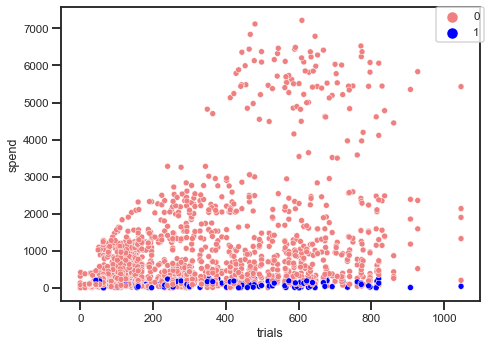

In [34]:
#plot10
# In this plot we see that when there was campaign instagram_1_D they spent much less than when they had other campaigns. 
# 0 (pink color) means there was no campaign 'instagram_1_D', while the 1 (blue color)  means there was no instagram_1_D.

plt.figure(figsize=(7,5))
sns.scatterplot(x='trials',y='spend',
                hue="campaign_instagram_1_D",s=35,palette=['lightcoral','blue'],
                data=dummed_data)
# place the legend outside the figure/plot
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.tight_layout()

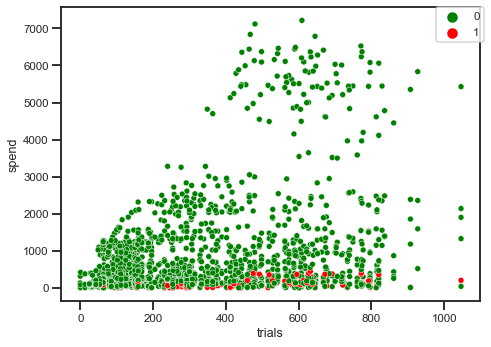

In [35]:
#plot11
# 0 means there was no "campaign_facebook_1_D" campaign, while 1 means there was "campaign_facebook_1_D".
plt.figure(figsize=(7,5))
sns.scatterplot(x='trials',y='spend',
                hue="campaign_facebook_1_D",s=35,data=dummed_data,palette=['green','red'],)
plt.legend(bbox_to_anchor=(1.01, 1),
           borderaxespad=0)
plt.tight_layout()

In [36]:
# we groupby date
# the following plot indicates that spending more money does not nessesarely means having more trials. there are points
# with high trials but less spending. Such as points in (~7000 trials,~6000 spend) or  (~6000 trials,~6000 spend)
grouped_data= dummed_data.groupby("date", as_index=False)[dummed_data.columns].sum()
grouped_data.head()

,date,trials,spend,campaign_apple_1_A,campaign_apple_4_D,campaign_apple_5_A,campaign_facebook_1_A,campaign_facebook_1_D,campaign_facebook_2_C,campaign_facebook_3_A,campaign_facebook_5_A,campaign_facebook_5_B,campaign_facebook_5_D,campaign_instagram_1_D,campaign_instagram_2_C,campaign_instagram_5_B,campaign_instagram_5_D
0,2020-05-24,0.0,35.230800,0,0,0,0,0,0,0,0,1,1,0,0,1,1
1,2020-05-25,4.0,49.969800,0,0,0,0,0,0,0,0,1,1,0,0,1,1
2,2020-05-26,0.0,65.688000,0,0,0,0,0,0,0,0,1,1,0,0,1,1
3,2020-05-27,8.0,123.032400,0,0,0,0,0,0,0,0,1,1,0,0,1,1
4,2020-05-28,0.0,87.424214,0,0,0,0,0,0,0,0,1,1,0,0,1,1


Text(0, 0.5, 'spend')

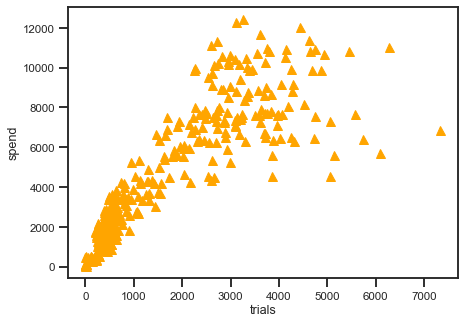

In [37]:
#plot12
plt.figure(figsize=(7,5))
plt.plot(grouped_data['trials'],grouped_data['spend'],'r^',
         color='orange',  lw=3)
plt.xlabel('trials')
plt.ylabel('spend')


## 1-4 Weekday analysis

In [38]:
# for each day we show which day of the week it is
data['day_of_week'] = data['date'].dt.day_name()

In [39]:
data.head()

,date,trials,campaign,spend,day_of_week
0,2020-05-24,0.0,facebook_5_B,17.0238,Sunday
1,2020-05-24,0.0,facebook_5_D,1.7034,Sunday
2,2020-05-24,0.0,instagram_5_B,14.8920,Sunday
3,2020-05-24,0.0,instagram_5_D,1.6116,Sunday
4,2020-05-25,1.0,facebook_5_B,22.6644,Monday


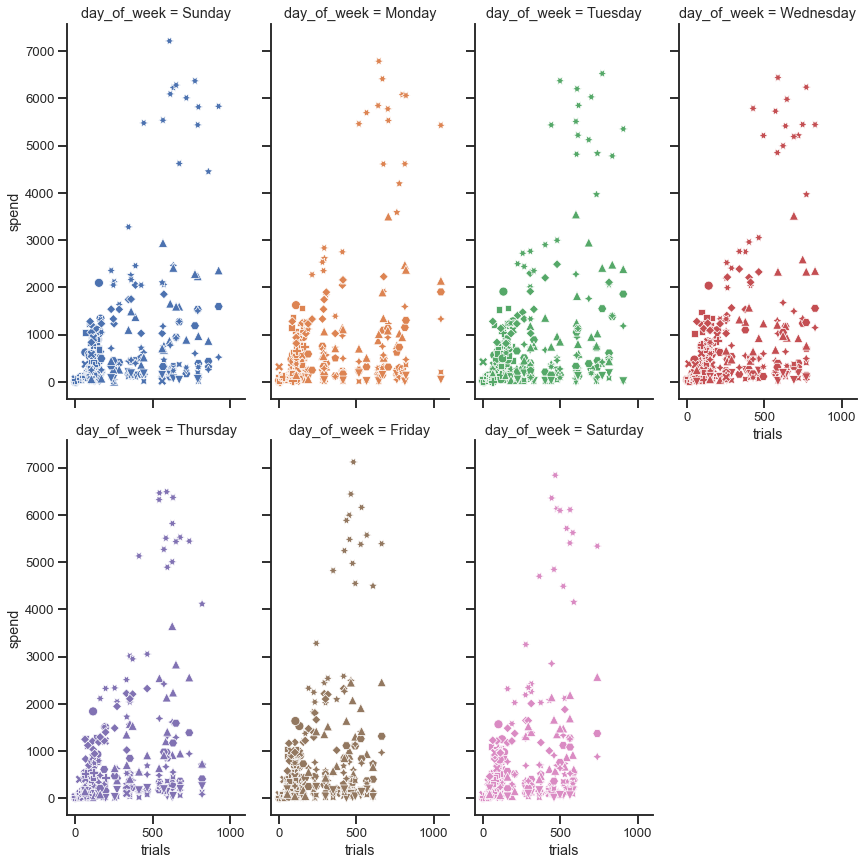

In [40]:
#plot13
#It seems that people downloaded the trials more often on Mondays and Sundays. The less downloaded day is Friday. However
# for finding the exact result furture investigation is nessesary. With fix spending.

sns.set_context('talk', font_scale=0.8) 
sns.set_style('ticks')
sns.relplot(data=data,x='trials',y='spend',hue="day_of_week",col="day_of_week",col_wrap=4,legend=False,height=6, 
                aspect=0.5, style='campaign', sizes=(500,400))

# Exact resuls:
### Lets calculate the number of trials for given 100 dollors for each campaigns
### 1- Best champaing:

In [41]:
# first obtain the total spent money and total trials for each campaign.
campaign_trials=data.groupby(by='campaign').sum()[['spend','trials']].sort_values(by='spend',ascending=False)
campaign_trials

,spend,trials
campaign,,
facebook_1_A,662534.318977,77639.0
instagram_2_C,196848.400901,86197.0
facebook_3_A,181740.999000,31528.0
facebook_2_C,115737.396794,86419.0
facebook_5_B,96329.558588,18076.0
instagram_5_B,90357.940736,18076.0
apple_4_D,87203.053800,85417.0
apple_1_A,66856.073400,19495.0
facebook_5_D,55673.730102,20026.0


In [42]:
# now we assign 100 $ for all campaigns and obtain trials for each of them for the invested money.
campaign_trials = campaign_trials.assign(percent=campaign_trials['trials']*100/campaign_trials['spend'])
campaign_trials

,spend,trials,percent
campaign,,,
facebook_1_A,662534.318977,77639.0,11.718487
instagram_2_C,196848.400901,86197.0,43.788519
facebook_3_A,181740.999000,31528.0,17.347764
facebook_2_C,115737.396794,86419.0,74.668173
facebook_5_B,96329.558588,18076.0,18.764749
instagram_5_B,90357.940736,18076.0,20.004883
apple_4_D,87203.053800,85417.0,97.951845
apple_1_A,66856.073400,19495.0,29.159654
facebook_5_D,55673.730102,20026.0,35.970286


In [43]:
# to better see the result we sort by higher percentenge of the trials
# As seen 'instagram_1_D' gives higher trials for given 100$. This is same result as observed in data analysis.
campaign_trials.groupby(by='campaign').sum().sort_values(by='percent', ascending=False)

,spend,trials,percent
campaign,,,
instagram_1_D,11892.162164,49936.0,419.906820
facebook_1_D,12206.690645,49936.0,409.087126
facebook_5_A,9052.510200,22274.0,246.053299
apple_5_A,11395.297200,15342.0,134.634488
apple_4_D,87203.053800,85417.0,97.951845
facebook_2_C,115737.396794,86419.0,74.668173
instagram_5_D,37174.075102,18076.0,48.625285
instagram_2_C,196848.400901,86197.0,43.788519
facebook_5_D,55673.730102,20026.0,35.970286


### 1- Best week-day:

In [44]:
data.head()

,date,trials,campaign,spend,day_of_week
0,2020-05-24,0.0,facebook_5_B,17.0238,Sunday
1,2020-05-24,0.0,facebook_5_D,1.7034,Sunday
2,2020-05-24,0.0,instagram_5_B,14.8920,Sunday
3,2020-05-24,0.0,instagram_5_D,1.6116,Sunday
4,2020-05-25,1.0,facebook_5_B,22.6644,Monday


In [45]:
week_day=data.groupby(by='day_of_week').sum()[['spend','trials']].sort_values(by='spend',ascending=False)
week_day

,spend,trials
day_of_week,,
Thursday,242880.450217,84045.0
Wednesday,241500.820146,86814.0
Tuesday,239125.444184,94692.0
Friday,232699.640702,72400.0
Sunday,230272.945789,91569.0
Monday,227088.117990,96093.0
Saturday,221434.788583,72824.0


In [46]:
week_day =week_day.assign(percent=week_day['trials']*100/week_day['spend'])
week_day.head(10)

,spend,trials,percent
day_of_week,,,
Thursday,242880.450217,84045.0,34.603444
Wednesday,241500.820146,86814.0,35.947704
Tuesday,239125.444184,94692.0,39.599299
Friday,232699.640702,72400.0,31.113069
Sunday,230272.945789,91569.0,39.765418
Monday,227088.117990,96093.0,42.315292
Saturday,221434.788583,72824.0,32.887335


In [47]:
week_day.groupby(by='day_of_week').sum().sort_values(by='percent', ascending=False)

,spend,trials,percent
day_of_week,,,
Monday,227088.117990,96093.0,42.315292
Sunday,230272.945789,91569.0,39.765418
Tuesday,239125.444184,94692.0,39.599299
Wednesday,241500.820146,86814.0,35.947704
Thursday,242880.450217,84045.0,34.603444
Saturday,221434.788583,72824.0,32.887335
Friday,232699.640702,72400.0,31.113069


In [48]:
week_day.groupby(by='day_of_week').sum().sort_values(by='percent', ascending=False).loc['Monday']

spend      227088.117990
trials      96093.000000
percent        42.315292
Name: Monday, dtype: float64

In [49]:
week_day.groupby(by='day_of_week').sum().sort_values(by='percent', ascending=False).iloc[:2]

,spend,trials,percent
day_of_week,,,
Monday,227088.117990,96093.0,42.315292
Sunday,230272.945789,91569.0,39.765418


In [50]:
week_day.groupby(by='day_of_week').sum().sort_values(by='percent', ascending=False).iloc[1:2]

,spend,trials,percent
day_of_week,,,
Sunday,230272.945789,91569.0,39.765418


In [51]:
week_day.groupby(by='day_of_week').describe()

spend                                                   \
            count           mean std            min            25%   
day_of_week                                                          
Friday        1.0  232699.640702 NaN  232699.640702  232699.640702   
Monday        1.0  227088.117990 NaN  227088.117990  227088.117990   
Saturday      1.0  221434.788583 NaN  221434.788583  221434.788583   
Sunday        1.0  230272.945789 NaN  230272.945789  230272.945789   
Thursday      1.0  242880.450217 NaN  242880.450217  242880.450217   
Tuesday       1.0  239125.444184 NaN  239125.444184  239125.444184   
Wednesday     1.0  241500.820146 NaN  241500.820146  241500.820146   

                                                         trials           ...  \
                       50%            75%            max  count     mean  ...   
day_of_week                                                               ...   
Friday       232699.640702  232699.640702  232699.640702    1.0  72400.0  ...   
Monday       227088.117990  227088.117990  227088.117990    1.0  96093.0  ...   
Saturday     221434.788583  221434.788583  221434.788583    1.0  72824.0  ...   
Sunday       230272.945789  230272.945789  230272.945789    1.0  91569.0  ...   
Thursday     242880.450217  242880.450217  242880.450217    1.0  84045.0  ...   
Tuesday      239125.444184  239125.444184  239125.444184    1.0  94692.0  ...   
Wednesday    241500.820146  241500.820146  241500.820146    1.0  86814.0  ...   

                              percent                                       \
                 75%      max   count       mean std        min        25%   
day_of_week                                                                  
Friday       72400.0  72400.0     1.0  31.113069 NaN  31.113069  31.113069   
Monday       96093.0  96093.0     1.0  42.315292 NaN  42.315292  42.315292   
Saturday     72824.0  72824.0     1.0  32.887335 NaN  32.887335  32.887335   
Sunday       91569.0  91569.0     1.0  39.765418 NaN  39.765418  39.765418   
Thursday     84045.0  84045.0     1.0  34.603444 NaN  34.603444  34.603444   
Tuesday      94692.0  94692.0     1.0  39.599299 NaN  39.599299  39.599299   
Wednesday    86814.0  86814.0     1.0  35.947704 NaN  35.947704  35.947704   

                                              
                   50%        75%        max  
day_of_week                                   
Friday       31.113069  31.113069  31.113069  
Monday       42.315292  42.315292  42.315292  
Saturday     32.887335  32.887335  32.887335  
Sunday       39.765418  39.765418  39.765418  
Thursday     34.603444  34.603444  34.603444  
Tuesday      39.599299  39.599299  39.599299  
Wednesday    35.947704  35.947704  35.947704  

[7 rows x 24 columns]

In [52]:
week_day.loc['Monday']

spend      227088.117990
trials      96093.000000
percent        42.315292
Name: Monday, dtype: float64

In [53]:
week_day.loc[['Monday','Sunday']]['percent']

day_of_week
Monday    42.315292
Sunday    39.765418
Name: percent, dtype: float64

In [54]:
week_day['trials'].mean()

85491.0